## 1. Import libraries

In [44]:
import os
# data manipulation
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# split data
from sklearn.model_selection import train_test_split

# preprocessing
from sklearn.preprocessing  import StandardScaler

# Machine Learning Models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
%matplotlib inline

## 2. Get familier with the data

In [2]:
# import data
data = pd.read_csv("data\\Usecase1_Dataset.csv")

In [3]:
data.shape

(11746, 60)

In [4]:
data.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weath

In [5]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,11746.000000,11746.000000,11746.000000,1.174600e+04,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1948.738379,1.289971,98.762557,1.673739e+05,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,30.576386,4.017484,7.501603,3.189238e+05,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,1600.000000,0.000000,0.000000,0.000000e+00,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,1927.000000,1.000000,100.000000,6.699400e+04,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,1941.000000,1.000000,100.000000,9.408000e+04,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1966.000000,1.000000,100.000000,1.584140e+05,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,2019.000000,161.000000,100.000000,1.421712e+07,40.912869,-73.715543,56.000000,51.000000,155101.000000


In [6]:
# Configuring pandas to display all the columns
pd.set_option("display.max.columns", None)
data.head(7)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

## 3. Data exploration and preprocessing

### 3.1 Exploration and preprocessing of response variable

In [7]:
# Glance at diffent values and its count for response variable
data.loc[:, 'ENERGY STAR Score'].value_counts().nlargest(20)

Not Available    2104
100               649
1                 299
99                162
80                144
84                142
83                138
86                138
88                136
73                128
87                128
82                128
89                127
79                126
85                126
81                126
93                125
74                124
92                124
77                123
Name: ENERGY STAR Score, dtype: int64

In [8]:
# Check % of "Not Available" value
Energy_star_score_NA = data.loc[data['ENERGY STAR Score']=='Not Available', 'ENERGY STAR Score'].shape[0]/len(data)*100
print("ENERGY STAR Score contains {} % Not Available values ".format(round(Energy_star_score_NA,2)))

ENERGY STAR Score contains 17.91 % Not Available values 


In [9]:
# Removing records with ENERGY STAR Score as Not Available from the model building
data = data.loc[data['ENERGY STAR Score']!='Not Available']

In [10]:
# Lets convert our dependent variable to numeric
data['ENERGY STAR Score'] = pd.to_numeric(data['ENERGY STAR Score'])

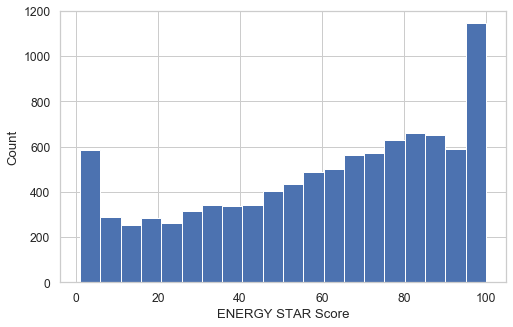

In [11]:
# Visualize ENERGY STAR Score
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data['ENERGY STAR Score'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='ENERGY STAR Score', ylabel='Count');

### 3.2 Handle 'Not Available' values in the data

In [12]:
# Replace all 'Not Available' values with na
data = data.replace({'Not Available':np.nan})

In [13]:
# Exploring other variable for missing value
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})

In [14]:
# Sorting by missing percentage
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
Order,Order,0.000000
Release Date,Release Date,0.000000
Source EUI (kBtu/ft²),Source EUI (kBtu/ft²),0.000000
Property GFA - Self-Reported (ft²),Property GFA - Self-Reported (ft²),0.000000
ENERGY STAR Score,ENERGY STAR Score,0.000000
Occupancy,Occupancy,0.000000
Number of Buildings - Self-reported,Number of Buildings - Self-reported,0.000000
Year Built,Year Built,0.000000
Largest Property Use Type - Gross Floor Area (ft²),Largest Property Use Type - Gross Floor Area (...,0.000000
Largest Property Use Type,Largest Property Use Type,0.000000


### 3.3 Drop columns with high missing values

In [15]:
# Drop the column if the mising value percentage is greater than 70%
cols = data.columns[data.isnull().mean()>0.7]
data.drop(cols, axis=1,inplace=True)

In [16]:
data.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Nor

In [17]:
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,NaN,NaN,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
5,6,28402,NYP Cornell (East Campus),28402,NYP Cornell (East Campus),1014800001,1-01480-0001,1084781; 1084780,525 East 68th Street,10021,1176,YORK AVENUE,Manhattan,2230742.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),2971874,1932,12,100,Whole Building,Whole Building,55,359.9,359,8.3,4.8,411.5,1.4322508769E9,1.43225088E7,86335350.5,2.45508594E7,54429.8,77564.1,-23134.3,2971874,NaN,NaN,414.2,04/27/2017 11:23:27 AM,No,In Compliance,40.761395,-73.957726,8.0,5.0,116.0,Lenox Hill-Roosevelt Island ...
12,15,2637863,Cadman Towers,2637863,Cadman Towers,3002320001;3002380035,3002320001;3002380035,3001727;3319420,101 Clark St,11201,NaN,NaN,NaN,NaN,Multifamily Housing,"Multifamily Housing, Other, Parking",Multifamily Housing,412503,1903,2,100,Whole Building,Whole Building,93,32,NaN,7.5,0,NaN,2047200,20472,11241926.1,3249755.2,1194,150.8,1043.2,432503,22061,51.01,87.9,04/28/2017 04:07:55 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
13,16,5871253,Cadman - 10 Clinton St,2637863,Cadman Towers,3002380035,3002380035,3319420,101 Clark St,11201,10,CLINTON STREET,Brooklyn,212656.0,Multifamily Housing,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,162656,1903,1,100,Whole Building,NaN,1,295.4,316.8,5.8,3,374.2,4.75229012E7,512710.7,3477064.5,1004824,2846.8,2524.2,322.7,172656,NaN,NaN,352.2,04/28/2017 04:07:55 PM,NaN,In Compliance,40.695835,-73.991673,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
14,17,2777235,STATEN ISLAND UNIVERSITY HOSPITAL Seaview,2777235,STATEN ISLAND UNIVERSITY HOSPITAL Seaview,5033550032;5033550065,5033550032;5-03355-0065,5049717;5104756,475 SEAVIEW AVE,10305,NaN,NaN,NaN,NaN,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),567517,1950,2,100,Whole Building,Whole Building,80,352.7,NaN,32.2,2.2,NaN,1.284867131E8,1255514.1,62425429.2,1.82958446E7,13302.6,7509.5,5793.1,567517,9574,16.87,599.5,04/25/2017 12:11:30 PM,No,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN


### 3.4 Drop irrelevent data based on self intution

In [18]:
# Remove identy and non relevent columns from data 
rmv_columns = ['Order', 'Property Id', 'Property Name', 'Parent Property Id', 'Parent Property Name', 'BBL - 10 digits',
                      'Address 1 (self-reported)', 'Street Number', 'Street Name', 'Release Date',
                      'Latitude', 'Longitude', 'NYC Borough, Block and Lot (BBL) self-reported', 
                      'NYC Building Identification Number (BIN)', 'DOF Benchmarking Submission Status', 'NTA']

In [19]:
data.drop(columns=rmv_columns, inplace=True)

### 3.5 Imputation for categorical data

In [20]:
# We see that numeric columns are displayed as categorical columns and vice versa
categorical_columns = ['Borough','Postal Code', 'Primary Property Type - Self Selected', 'List of All Property Use Types at Property',
                      'Largest Property Use Type', 'Metered Areas (Energy)', 'Metered Areas  (Water)',
                      'Water Required?']

In [21]:
# impute mode for missing values of categorical variables
for col in data.columns:
    if col in categorical_columns:
        data[col] = data[col].fillna(data[col].value_counts().index[0])    

Frequency chart of Borough
Number of uniques values for Borough are : 5


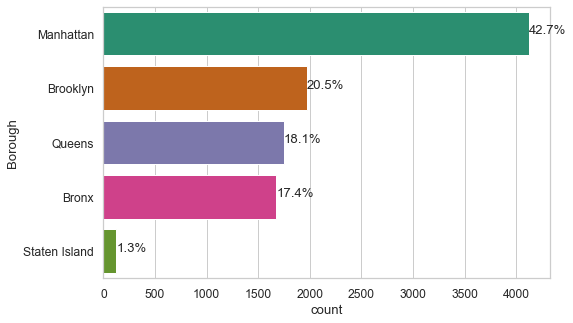

Frequency chart of Postal Code
Number of uniques values for Postal Code are : 266


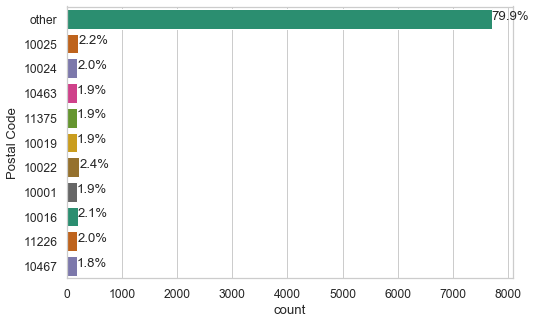

Frequency chart of Primary Property Type - Self Selected
Number of uniques values for Primary Property Type - Self Selected are : 25


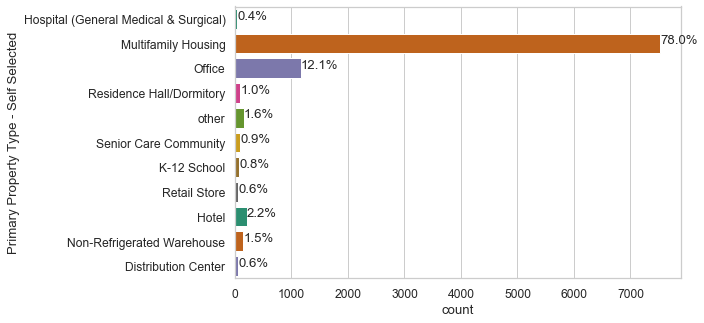

Frequency chart of List of All Property Use Types at Property
Number of uniques values for List of All Property Use Types at Property are : 494


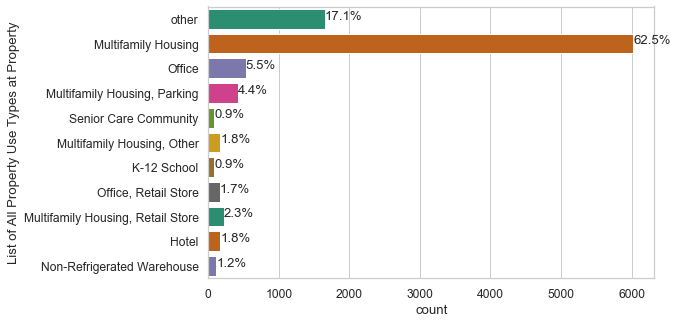

Frequency chart of Largest Property Use Type
Number of uniques values for Largest Property Use Type are : 19


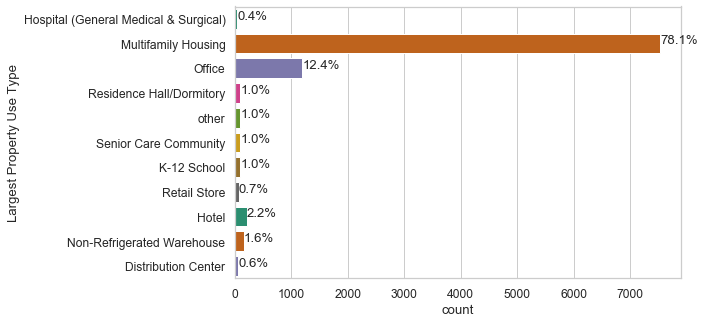

Frequency chart of Metered Areas (Energy)
Number of uniques values for Metered Areas (Energy) are : 2


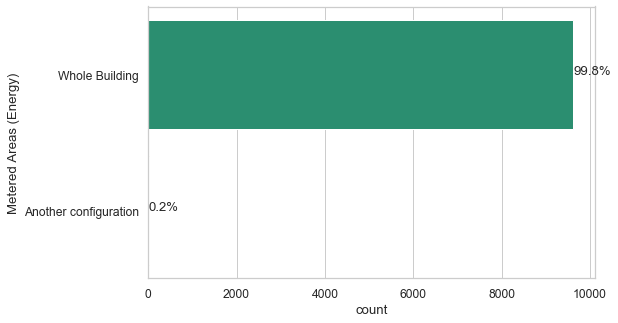

Frequency chart of Metered Areas  (Water)
Number of uniques values for Metered Areas  (Water) are : 5


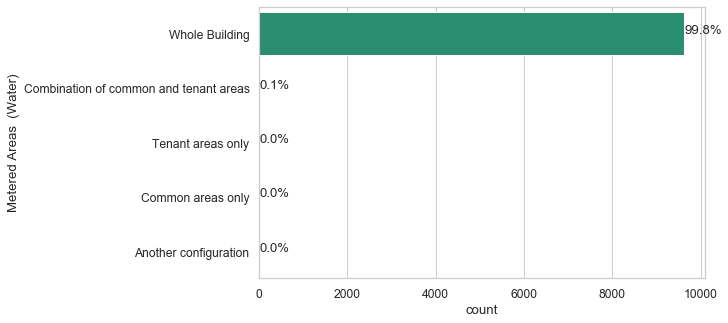

Frequency chart of Water Required?
Number of uniques values for Water Required? are : 2


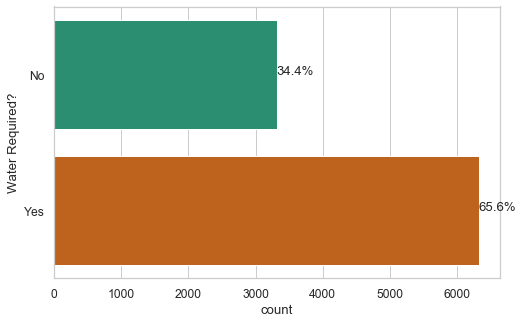

In [22]:
# Visualize all categorical columns under consideration
for col in categorical_columns:
    print(f'Frequency chart of {col}')
    print(f'Number of uniques values for {col} are : {data[col].nunique()}')
    top10_values = data[col].value_counts()[:10]
    top10_values_list = data[col].value_counts()[:10].index.tolist()
    if data[col].nunique() > 10:
        data.loc[~data[col].isin(top10_values_list), col]='other'
    chart = sns.countplot(palette='Dark2',y=col, data=data)
    total = len(data[col])
    for p in chart.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        chart.annotate(percentage, (x, y))
    plt.show()

### 3.6 Imputation for numerical data

In [23]:
# Preprocessing numerical variables
# Convert categorical columns to numerical which supposed to be numeric and impute median for nan's
for col in data.columns:
    if col not in categorical_columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].fillna(data[col].median())

Distribution of DOF Gross Floor Area


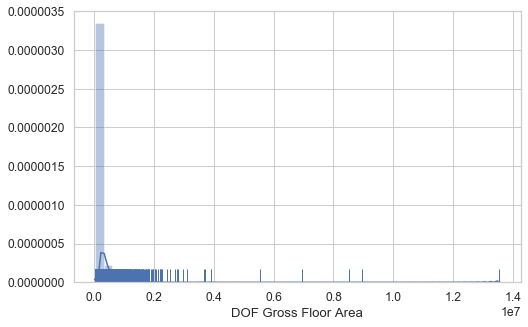

Distribution of Largest Property Use Type - Gross Floor Area (ft²)


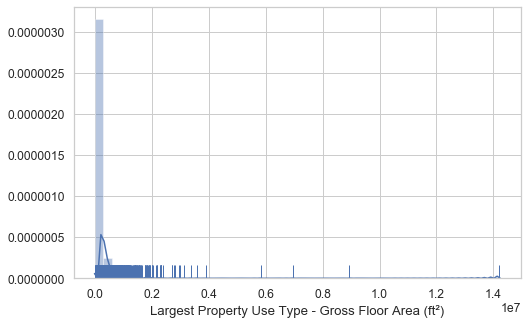

Distribution of Year Built


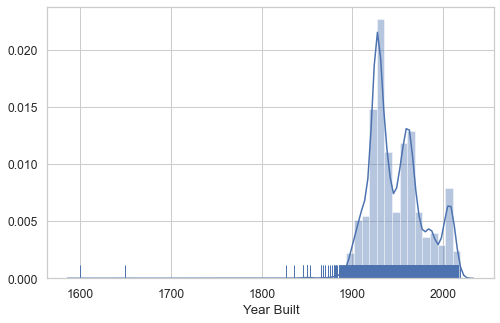

Distribution of Number of Buildings - Self-reported


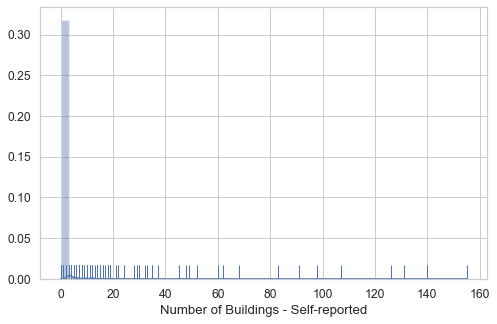

Distribution of Occupancy


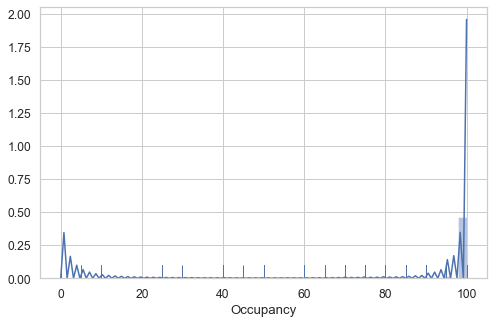

Distribution of ENERGY STAR Score


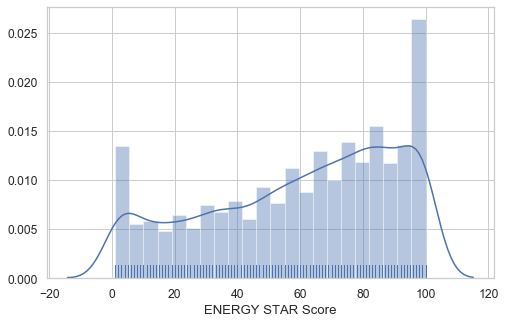

Distribution of Site EUI (kBtu/ft²)


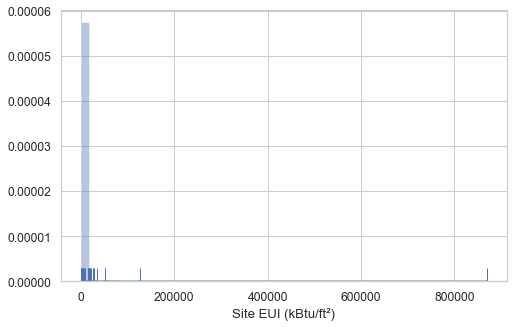

Distribution of Weather Normalized Site EUI (kBtu/ft²)


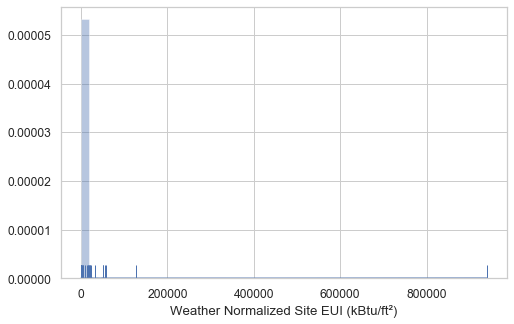

Distribution of Weather Normalized Site Electricity Intensity (kWh/ft²)


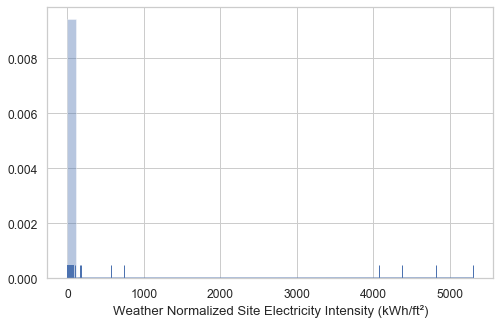

Distribution of Weather Normalized Site Natural Gas Intensity (therms/ft²)


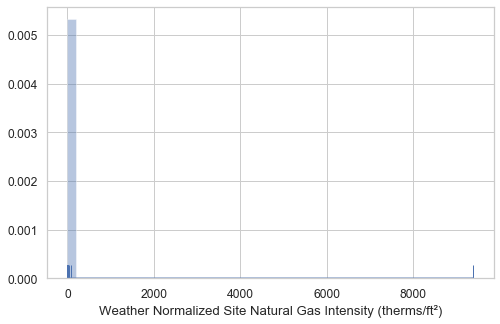

Distribution of Weather Normalized Source EUI (kBtu/ft²)


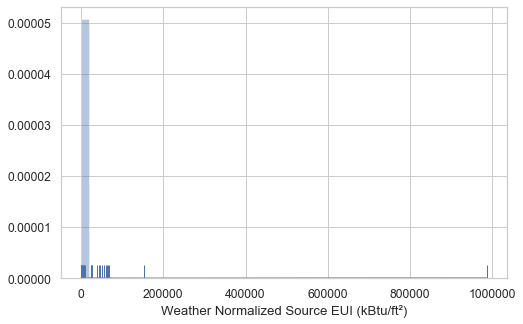

Distribution of Natural Gas Use (kBtu)


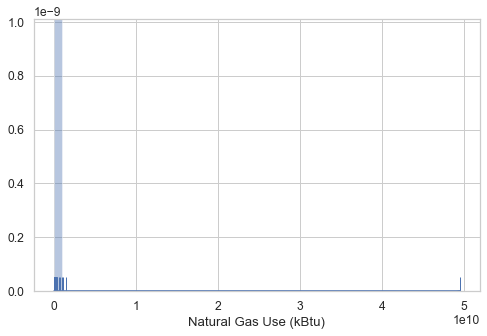

Distribution of Weather Normalized Site Natural Gas Use (therms)


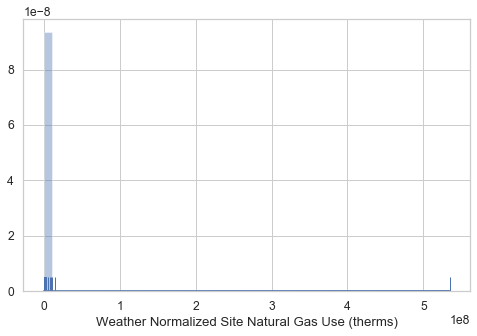

Distribution of Electricity Use - Grid Purchase (kBtu)


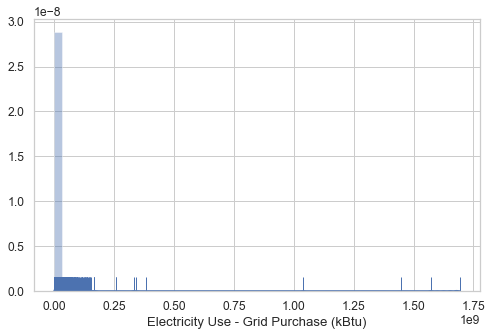

Distribution of Weather Normalized Site Electricity (kWh)


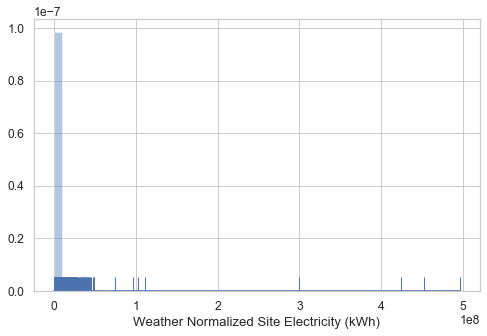

Distribution of Total GHG Emissions (Metric Tons CO2e)


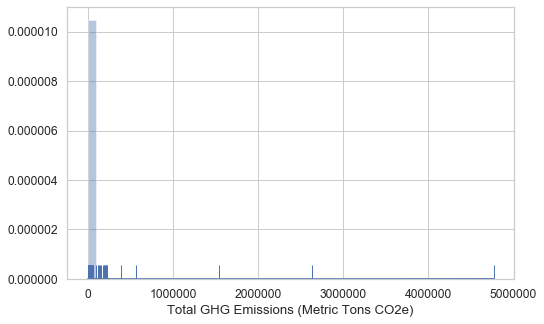

Distribution of Direct GHG Emissions (Metric Tons CO2e)


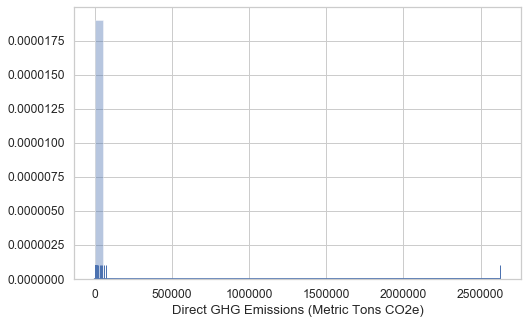

Distribution of Indirect GHG Emissions (Metric Tons CO2e)


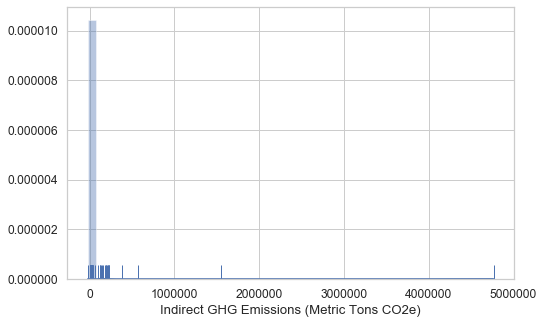

Distribution of Property GFA - Self-Reported (ft²)


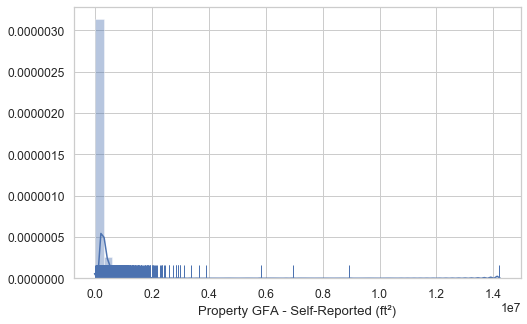

Distribution of Water Use (All Water Sources) (kgal)


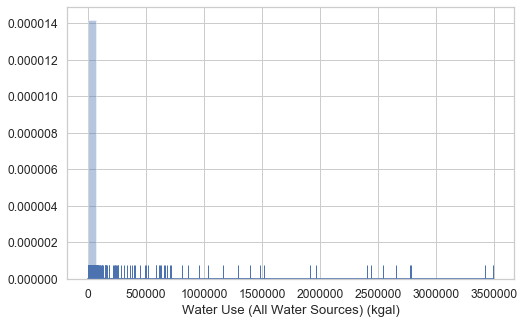

Distribution of Water Intensity (All Water Sources) (gal/ft²)


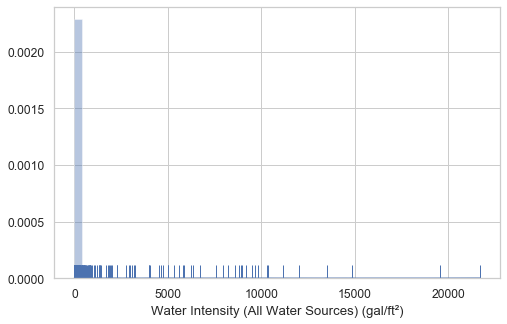

Distribution of Source EUI (kBtu/ft²)


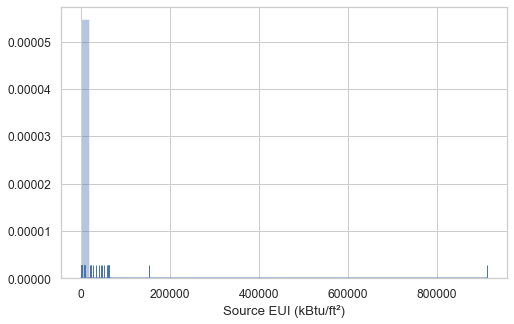

Distribution of Community Board


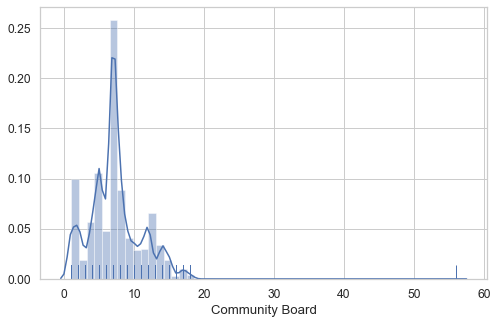

Distribution of Council District


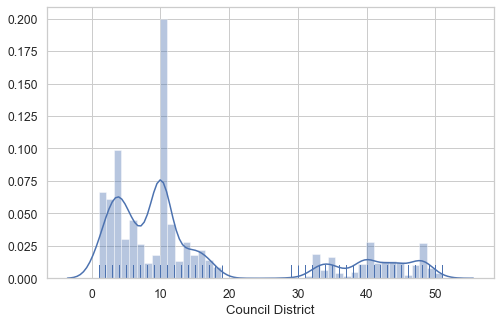

Distribution of Census Tract


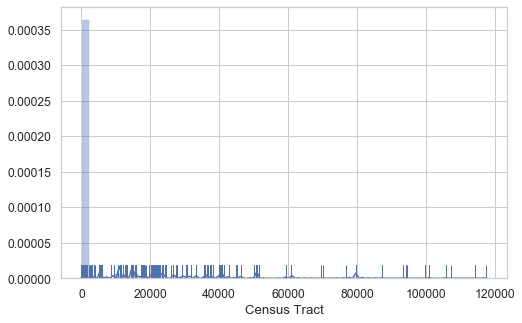

In [26]:
# Visualizing numerical variables
for col in data.columns:
    if col not in categorical_columns:
        print("Distribution of {}".format(col))
        sns.distplot(data[col], rug=True)
        plt.show()

### 3.7 Check correlation of top features

In [28]:
# Check correlation of top 15 features with ENERGY STAR Score
correlation = data.corr(method='pearson')
columns = correlation.nlargest(15, 'ENERGY STAR Score').index
columns


Index(['ENERGY STAR Score', 'Community Board', 'Council District',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       'Property GFA - Self-Reported (ft²)', 'DOF Gross Floor Area',
       'Census Tract', 'Water Intensity (All Water Sources) (gal/ft²)',
       'Water Use (All Water Sources) (kgal)',
       'Number of Buildings - Self-reported',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Natural Gas Use (kBtu)', 'Direct GHG Emissions (Metric Tons CO2e)',
       'Occupancy'],
      dtype='object')

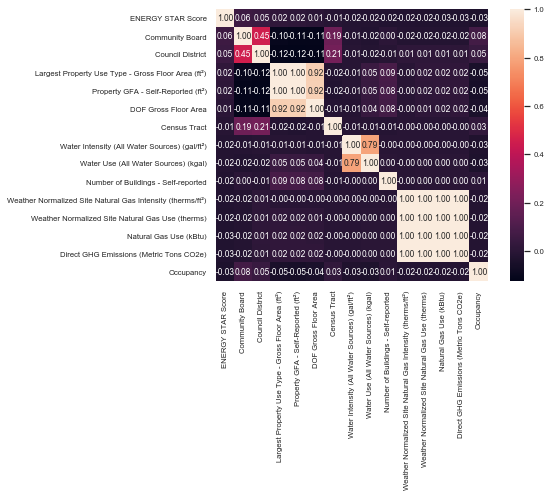

In [29]:
correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=0.7)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, 
                      xticklabels=columns.values)

plt.show()

In [30]:
data_processed = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

## 4. Model building

### 4.1 Split data as train and test set

In [31]:
y = data_processed.loc[:,['ENERGY STAR Score']]
X = data_processed.drop(columns=['ENERGY STAR Score'])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

### 4.2 Baseline algorithm test

In [51]:
%%time
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -709.954994 (48.041334)
ScaledLASSO: -743.573947 (42.675720)
ScaledEN: -752.455425 (39.036632)
ScaledKNN: -707.042359 (31.811437)
ScaledCART: -331.561765 (31.891992)
ScaledGBM: -159.621450 (9.844506)


###### From the output above, it looks like the Gradient Boosting Regressor looks to be the best model for this problem. I will build the regression algorithm using the Gradient Boosting Regressor. The GBM will be tested with a few n_estimators using the GridSearchCV function

In [35]:
%%time

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,200]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=5, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-168.598004 (5.846709) with: {'n_estimators': 50}
-158.440688 (3.793480) with: {'n_estimators': 100}
-155.174626 (1.732970) with: {'n_estimators': 200}
Best: -155.174626 using {'n_estimators': 200}
Wall time: 1min 8s


### 4.3 Finalise and validate model

In [36]:
%%time
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=200)
model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print(mean_squared_error(y_test, predictions))

174.99849381729172
Wall time: 6.53 s


### 4.4 Imporatant features

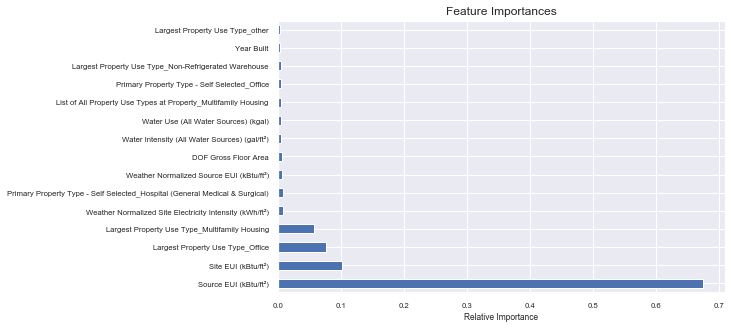

In [37]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
sns.set(font_scale=1.0)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.show()

In [38]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : y_test['ENERGY STAR Score']})
compare.head(10)

,Prediction,Test Data
6681,97.383705,100
2764,64.324947,82
1249,48.497417,60
5804,86.945928,100
8345,75.786157,86
8334,49.018989,49
3737,88.525794,83
10202,100.858908,100
2697,99.760420,100
9248,50.231148,45


### 4.5 Check model performance

#### 4.5.1 Regression model performance

In [33]:
def get_model_accuracy(y_test, y_pred):
    """Function to calculate mean absolute error, r2 and print the distribution of y_pred and y_test
    
    Args:
        y_test (np.array): 1 dimensional array of actual numeric values
        y_pred (np.array): 1 dimensional array of predicted numeric values
        
    Returns:
        (rmse, mae, r2): Tuple of error metric values
    
    """
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("RMSE : {}".format(rmse))
    print("MAE : {}".format(mae))
    print("R square : {}".format(r2))
    # Visualize distribution of y_test and y_pred
    plt.hist(y_test.values, label='Actual Values')
    plt.hist(y_pred, color='yellow', alpha=0.5, label='Predicted Values')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Distribution of actual and predicted values')
    plt.show()
    return (rmse, mae, r2)

RMSE : 13.228699626845101
MAE : 9.258823602979778
R square : 0.8103966014348495


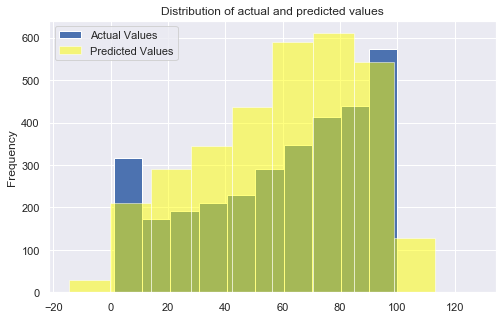

(13.228699626845101, 9.258823602979778, 0.8103966014348495)

In [39]:
get_model_accuracy(y_test['ENERGY STAR Score'], predictions)

#### 4.5.2 Model accuracy based on category and score band

In [40]:
# Checking model performance based on category and score band
def assign_score_category(score):
    if score > 85:
        cat = 'A'
    elif score > 70:
        cat = 'B'
    elif score > 55:
        cat = 'C'
    elif score <= 55:
        cat = 'D'
    else:
        cat = 'Not Covereed'
    return cat

In [41]:
y_test_cats = y_test['ENERGY STAR Score'].apply(assign_score_category)

In [42]:
y_pred_cats = pd.DataFrame(predictions)[0].apply(assign_score_category)

In [45]:
# Accuracy of the model as a classifier
accuracy_score(y_test_cats, y_pred_cats)

0.7108736643620365